In [1]:
"""
Взять boston house-prices datase (sklearn.datasets.load_boston) 
и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, 
поподбирать параметры, вывести итоговое качество)
"""

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor     # выполняет линейную регрессию с использованием градиентного спуска
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error    # средняя кваратичная ошибка 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = load_boston()

# Хорошая статья "Простые регрессионные модели в Python" - Простые регрессионные модели в Python
# https://nagornyy.me/courses/data-science/regression/ 

In [2]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
data_ = pd.DataFrame(data.data, columns=data.feature_names)
data_

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
X = data.data
y = data.target
print('Распределение выборки по классам: ', y)

Распределение выборки по классам:  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 3

In [6]:
data_.describe()

# Задача данной выборки сводится к прогнозированию 
# целевого показателя (медианной стоимости недвижимости), 
# используя приведенные выше показатели (все, кроме TARGET)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


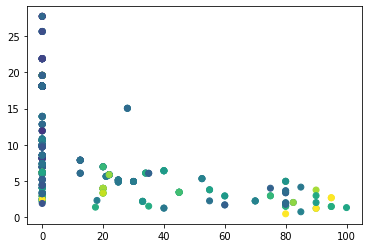

In [8]:
# rcParams['figure.figsize'] = (9, 15)
plt.scatter(X[:,1], X[:,2],c=y)
# plt.scatter(X, y, cmap='ocean', s=60) 
# ax = plt.subplots(1, figsize=(15,5))
# plt.scatter(x=data.X, y=data.y, alpha=0.1, color='b')

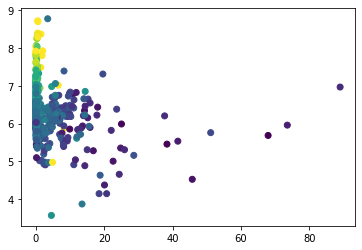

In [9]:
plt.scatter(X[:,0], X[:,5],c=y)

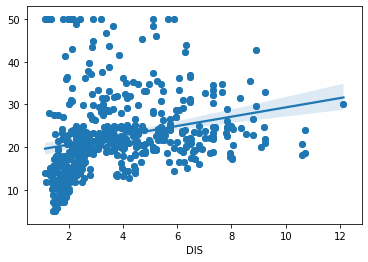

In [10]:
# Вначале сделаем более простую модель. Предположим, мы просто хотим использовать признак DIS для прогнозирования TARGET
plt.scatter(data_['DIS'], y)
sns.regplot(x="DIS", y=y, data=data_)
# жесткой прямой зависимости не наблюдается, но существует несильная прямая взаимосвязь

In [11]:
# Перед началом построения регрессии нормализуем данные.
# Это решит ряд проблем, например,  это ускорит обучение 
# и снизит вероятность застревания в локальном оптимуме, если функция оценки не является выпуклой

scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_) 


In [12]:
# разделим датасет на трейн и тест 
# X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=0)
# scaled_df[~scaled_df['MEDV']]  # все столбцы кроме колонки MEDV
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [13]:
linear_reg_model = SGDRegressor(tol=.0001, eta0=.01) # tol сообщает модели, когда следует прекратить итерацию 
                                                        # (когда MSE будет ниже этого значения, остановимся),
                                                     # eta0 - начальная скорость обучения
linear_reg_model.fit(X_train, y_train)
predictions = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_test, predictions) 
print(f'RMSE: {np.sqrt(mse)}')

RMSE: 5.824212386778604


In [14]:
# попробуем поработать с полиномиальными переменными 

poly = PolynomialFeatures(2, include_bias=False)  # Функция PolynomialFeatures генерирует новую матрицу показателей, 
                                                  # состоящую из всех их полиномиальных комбинаций 
                                                  # со степенью меньше или равной 2
                                           #         Если include_bias=True (по умолчанию), тогда включается столбец смещения, 
                                           #         признак, в котором все полиномиальные степени равны нулю
poly_df = poly.fit_transform(X_train, y_train) 
scaled_poly_df = scaler.fit_transform(poly_df) 
print(f"shape: {scaled_poly_df.shape}")



shape: (404, 104)


In [15]:
# качество практически осталось на том же уровне 
linear_reg_model.fit(X_train, y_train)
predictions = linear_reg_model.predict(X_test) 
mse = mean_squared_error(y_test, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 5.866139214043504


In [16]:
# обучим модель методом Lasso 
clf = Lasso(alpha=0, random_state=43)
clf_df = clf.fit(X_train, y_train)

# Лассо очень похожа на ридж регрессию. В ней штраф — это сумма модулей значений коэффициентов.
# В чем сила ридж и лассо?
# Ридж регрессия снижает размер коэффициентов, 
# а лассо сокращает многие до 0 
# Это позволяет снизить размерность (ридж) и выбрать важные предикторы (лассо)

C:\Users\zlatt\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zlatt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\zlatt\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3903.9469811243202, tolerance: 3.4398062970297034
  positive)


In [17]:
# ошибка фактически неизменна 
predictions = clf.predict(X_test) 
mse = mean_squared_error(y_test, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 5.783509315085138


In [18]:
clf.score(X_test, y_test)

0.5892223849182504

In [19]:
# Построим еще модель 
# Ридж-регрессия, или гребневая регрессия (ridge regression), - это один из методов понижения размерности. 
# Часто его применяют для борьбы 
# с переизбыточностью данных, когда независимые переменные коррелируют друг с другом 
# (т.е. имеет место мультиколлинеарность)

clf_ = Ridge(alpha=0.1, random_state=43)
clf_.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=43, solver='auto', tol=0.001)

In [20]:
# Исследуем качество 
clf_.score(X_test, y_test)

0.5891138302243746

In [21]:
# ошибка снова такая же
predictions = clf_.predict(X_test) 
mse = mean_squared_error(y_test, predictions) 
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 5.784273458002458


In [22]:
# изучим, какие коэффициенты для признаков модель получила в ходе обучения
linear_reg_model.fit(scaled_df, y) 
sorted(list(zip(data_.columns, linear_reg_model.coef_)), 
       key=lambda x: abs(x[1]))

# Каждый коэффициент есть среднее изменение 
# цены на жилье при изменении соответствующего показателя на единицу 
# при условии, что остальные показатели меняться не будут. 
# Скажем, если значения других показателей неизменны, 
# то увеличение INDUS на единицу снижает y (цену на жилье) на 0,22, 
# а увеличение B увеличивает его на 0,85.

[('AGE', -0.09103342608578739),
 ('INDUS', -0.24123928920821902),
 ('CRIM', -0.8139344482026387),
 ('CHAS', 0.8197816096069324),
 ('B', 0.868413900669396),
 ('ZN', 0.9046665467758177),
 ('TAX', -1.0555655325683948),
 ('RAD', 1.661578773497347),
 ('NOX', -1.7779954215057037),
 ('PTRATIO', -1.9999459107740667),
 ('RM', 2.8315376966052734),
 ('DIS', -2.9110629054547026),
 ('LSTAT', -3.697291188701306)]

In [23]:
# а теперь обучим модель на целой серии выборок

n_bootstraps = 1_000 
bootstrap_X = [] 
bootstrap_y = [] 

for _ in range(n_bootstraps): 
    sample_X, sample_y = resample(scaled_df, y) # на выходе имеем последовательность пересэмплированных копий датафрейма
    bootstrap_X.append(sample_X) 
    bootstrap_y.append(sample_y)

In [24]:
# Обучим модель на каждом из полученных датасетов и получим следующие коэффициенты
coeffs = [] 
for i, data in enumerate(bootstrap_X):
    linear_reg_model.fit(data, bootstrap_y[i])
    coeffs.append(linear_reg_model.coef_)
    

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

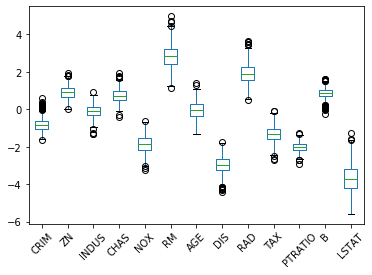

In [25]:
# построим диаграмму размаха по признакам
coef_df = pd.DataFrame(coeffs, columns=data_.columns) 
coef_df.plot(kind='box') 
plt.xticks(rotation=45)

# видим, что у DIS, И (и в большой мере у TAX) аномалии 
# находятся под нижней границей значимых данных (1,5 ICQ - полтора интерквартильных расстояния, которое равно Q_75 - Q_25), 
# у CRIM, ZN и RAD - за верхней границей
# Про ящик с усами: https://habr.com/ru/post/267123/ 

count    1000.000000
mean       -2.959199
std         0.435750
min        -4.424990
25%        -3.235932
50%        -2.967203
75%        -2.652476
max        -1.732612
Name: DIS, dtype: float64


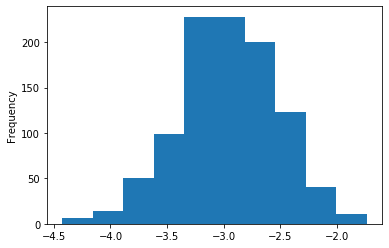

In [26]:
# Посмотрим, что нам демонстрируют коэффициенты
print(coef_df['DIS'].describe())

# Построим график
coef_df['DIS'].plot(kind='hist')

In [37]:
# Теперь попробуем применить кросс-валидацию, подобрав попутно лучшие параметры для исследования

regr = SGDRegressor(random_state=15)  

grid_param = {
    'tol': [.0001, .0005, .001, .005, .01, .05, .1],
#     'loss': ['loss', 'squared_loss'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [.0001, .0005, .001, .005, .01, .05, .1], 
#     'fit_intercept': ['True', 'False'],
    'epsilon': [.001, .005, .01, .05, .1]
}

In [41]:
gd_sr = RandomizedSearchCV(estimator=regr,
                     param_distributions=grid_param,
                     scoring='neg_mean_squared_error',
                     n_iter=15,
                     cv=3,
                     n_jobs=-1)
gd_sr

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=15,
                                          shuffle=True, tol=0.001,
                                          validation_fraction=0.1, verbose=0,
                                          warm_...
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.0005, 0.001, 0.005,
                                                

In [42]:
gd_sr.fit(X_train, y_train) 

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=15,
                                          shuffle=True, tol=0.001,
                                          validation_fraction=0.1, verbose=0,
                                          warm_...
                   iid='deprecated', n_iter=15, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.0005, 0.001, 0.005,
                                                

In [43]:
# Выведем на экран лучшие параметры и ошибку, возникающую при их использовании 

print(f'Лучшие параметры: {gd_sr.best_params_}') 
print(f'Лучшая оценка MSE: {gd_sr.best_score_}')

# отрицательная MSE: функции CV в scikit-learn пытаются максимизировать значение

Лучшие параметры: {'tol': 0.05, 'penalty': 'elasticnet', 'epsilon': 0.1, 'alpha': 0.005}
Лучшая оценка MSE: -23.458259745800003


In [ ]:
# Больше о случайном и «сеточном» вариантах поиска: https://scikit-learn.org/stable/modules/grid_search.html.

# В scikit-learn есть много других CV-функций.
# Документация по ним: https://scikit-learn.org/stable/modules/cross_validation.html